In [1]:
%reset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr
import cartopy.crs as ccrs
import netCDF4 as nc
import matplotlib.ticker as mticker
import warnings; warnings.filterwarnings('ignore')
import cmocean
from gsw import alpha, SA_from_SP, p_from_z, CT_from_pt, beta, sigma1 

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:
%cd /work/eay/OM4_rerun2/20030101.nc/
fs=xr.open_dataset('20030101.ocean_static_no_mask_table.nc')
lon=fs['geolon']; lat=fs['geolat']
lonu=fs['geolon_u']; latu=fs['geolat_u']
lonv=fs['geolon_v']; latv=fs['geolat_v']
print(fs)


/work2/eay/OM4_rerun2/20030101.nc
<xarray.Dataset>
Dimensions:    (time: 1, xh: 1440, xq: 1440, yh: 1080, yq: 1080)
Coordinates:
  * xh         (xh) float64 -299.7 -299.5 -299.2 -299.0 ... 59.53 59.78 60.03
  * yh         (yh) float64 -80.39 -80.31 -80.23 -80.15 ... 89.73 89.84 89.95
  * time       (time) object 1900-01-01 00:00:00
  * xq         (xq) float64 -299.6 -299.3 -299.1 -298.9 ... 59.66 59.91 60.16
  * yq         (yq) float64 -80.35 -80.27 -80.19 -80.11 ... 89.78 89.89 90.0
Data variables:
    areacello  (yh, xh) float32 ...
    geolon     (yh, xh) float32 ...
    geolat     (yh, xh) float32 ...
    geolon_c   (yq, xq) float32 ...
    geolat_c   (yq, xq) float32 ...
    geolon_u   (yh, xq) float32 ...
    geolat_u   (yh, xq) float32 ...
    geolon_v   (yq, xh) float32 ...
    geolat_v   (yq, xh) float32 ...
    wet        (yh, xh) float32 ...
    wet_c      (yq, xq) float32 ...
    wet_u      (yh, xq) float32 ...
    wet_v      (yq, xh) float32 ...
    dxt        (yh, xh) flo

In [24]:
title='2003-10-13' #J16 F15 M17 A16 M17 J15 Jy15 A17 S18 O13 N D12
data1=xr.open_dataset('20030101.ocean_5daily.nc').sel(time=title, method='nearest')
print(data1)
salt=data1['so']
temp=data1['thetao']
e=data1['e']
depth=data1['depth_ocean']
xh=data1['xh']
yh=data1['yh']


<xarray.Dataset>
Dimensions:           (time: 1, xh: 1440, xq: 1440, yh: 1080, yq: 1080, zi: 76, zl: 75)
Coordinates:
  * xh                (xh) float64 -299.7 -299.5 -299.2 ... 59.53 59.78 60.03
  * yh                (yh) float64 -80.39 -80.31 -80.23 ... 89.73 89.84 89.95
  * time              (time) object 2003-10-13 00:00:00
  * zl                (zl) float64 1.0 3.0 5.0 ... 3.338e+03 3.591e+03 5.111e+03
  * xq                (xq) float64 -299.6 -299.3 -299.1 ... 59.66 59.91 60.16
  * yq                (yq) float64 -80.35 -80.27 -80.19 ... 89.78 89.89 90.0
  * zi                (zi) float64 0.0 2.0 4.0 ... 3.461e+03 3.722e+03 6.5e+03
Data variables:
    zos               (time, yh, xh) float32 ...
    thetao            (time, zl, yh, xh) float32 ...
    so                (time, zl, yh, xh) float32 ...
    uh                (time, zl, yh, xq) float32 ...
    vh                (time, zl, yq, xh) float32 ...
    e                 (time, zi, yh, xh) float32 ...
    MLD_003           (ti

In [25]:
xh.shape

(1440,)

In [26]:
np.max(depth)

<xarray.DataArray 'depth_ocean' ()>
array(6500.)

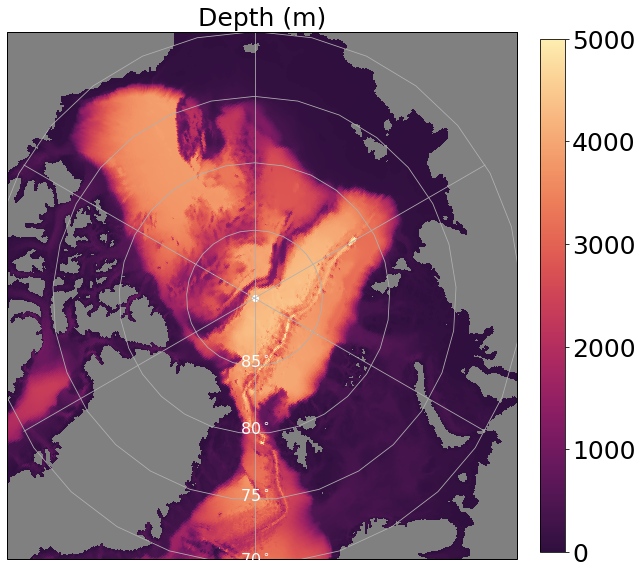

In [41]:
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection=ccrs.Orthographic(0, 90))
ax.set_extent([-180, 180, 70, 90],ccrs.PlateCarree())

plt.pcolormesh(lon, lat,np.ones((1080,1440)),transform=ccrs.PlateCarree(),cmap='gray',vmin=0,vmax=2);
PC=plt.pcolormesh(lon, lat,depth,transform=ccrs.PlateCarree(),cmap=cmocean.cm.matter_r,vmin=0,vmax=5000);
#CT=plt.contour(lon, lat, deptho, [200], transform=ccrs.PlateCarree(),colors='k',linewidth=.5)


cbar=plt.colorbar(PC,fraction=0.046, pad=0.04); cbar.ax.tick_params(labelsize=25);
gl=ax.gridlines(crs=ccrs.PlateCarree())
plt.title('Depth (m)',fontsize=25)
gl.ylocator = mticker.FixedLocator([70, 75, 80, 85, 90])


ax.scatter(180, 90, marker='o',c='white', transform=ccrs.PlateCarree())
pointx=[0,0,0,0]; pointy=[70,75,80,85]; text=['70$^\circ$','75$^\circ$','80$^\circ$','85$^\circ$']
for i in range(len(pointx)):
    ax.text(pointx[i],pointy[i],text[i],ha='center', transform=ccrs.PlateCarree(),fontsize=16,color='white')


(1, 75, 93, 403)

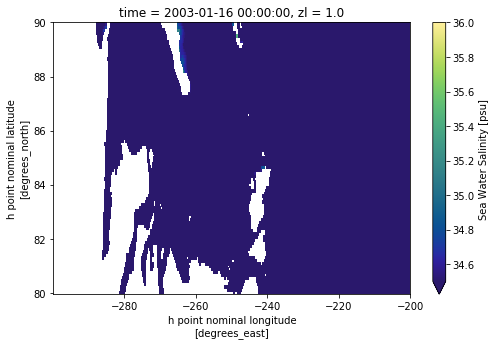

In [42]:
fig = plt.figure(figsize=(8, 5))

salt2d=salt.sel(xh=slice(-300,-200),yh=slice(80,90))    
salt2d[0,0,:,:].plot(vmin=34.5,vmax=36,cmap=cmocean.cm.haline)
salt2d.shape

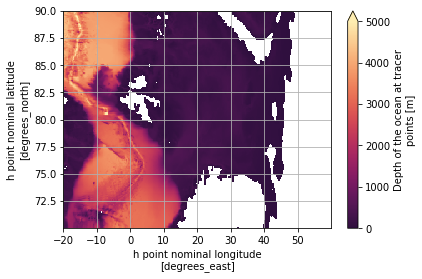

In [20]:
#fig = plt.figure(figsize=(8, 5))
#IF YOU WANT TO USE XARRAY, CHANGE COORDINATES:
# lonin = xr.open_dataset('ocean_monthly_z.static.nc')['geolon']
# latin = xr.open_dataset('ocean_monthly_z.static.nc')['geolat']
# ds=ds.assign_coords(xnew=lonin)
# ds=ds.assign_coords(ynew=latin)
# proj=ccrs.NorthPolarStereo()
# ax = plt.axes(projection=proj);
# ds.deptho.plot.pcolormesh(ax=ax,transform=ccrs.PlateCarree(),x='xnew', y='ynew');
# ax.set_extent([-180, 180, 70, 90], ccrs.PlateCarree())

#Barents Sea:
depth2d=depth.sel(xh=slice(-20,60),yh=slice(70,90)) 
#Kara Sea:
#depth2d=depth.sel(xh=slice(-300,-200),yh=slice(80,90))   
#Laptev/East Siberian Sea
#depth2d=depth.sel(xh=slice(-300,-160),yh=slice(70,90))   
#Novaya zemlya area
#depth2d=depth.sel(xh=slice(-20,60),yh=slice(70.,90))  
depth2d.plot(vmin=0,vmax=5000,cmap=cmocean.cm.matter_r)
plt.grid()


In [31]:
#Barents Sea Slice:
e2d=np.squeeze(e.sel(yh=[86], method='nearest').sel(xh=slice(-20,50)))
salt2d=np.squeeze(salt.sel(yh=[86], method='nearest').sel(xh=slice(-20,50)))
temp2d=np.squeeze(temp.sel(yh=[86], method='nearest').sel(xh=slice(-20,50)))  
xh2d=xh.sel(xh=slice(-20,50))

#Kara Sea Slice:
#e2d=np.squeeze(e.sel(yh=[88], method='nearest').sel(xh=slice(-300,-200)))
#salt2d=np.squeeze(salt.sel(yh=[88], method='nearest').sel(xh=slice(-300,-200)))
#temp2d=np.squeeze(temp.sel(yh=[88], method='nearest').sel(xh=slice(-300,-200))) 
#xh2d=xh.sel(xh=slice(-300,-200))

#Laptev/East Siberian Sea Slice:
#e2d=np.squeeze(e.sel(xh=[-210], method='nearest').sel(yh=slice(70,90)))
#salt2d=np.squeeze(salt.sel(xh=[-210], method='nearest').sel(yh=slice(70,90))) 
#temp2d=np.squeeze(temp.sel(xh=[-210], method='nearest').sel(yh=slice(70,90))) 
#yh2d=yh.sel(yh=slice(70, 90))

#Novaya zemlya Slice:
# e2d=np.squeeze(e.sel(yh=[86], method='nearest').sel(xh=slice(20,50)))
# salt2d=np.squeeze(salt.sel(yh=[86], method='nearest').sel(xh=slice(20,50)))
# temp2d=np.squeeze(temp.sel(yh=[86], method='nearest').sel(xh=slice(20,50)))  
# xh2d=xh.sel(xh=slice(20,50))

#Severnaya zemlya
#e2d=np.squeeze(e.sel(yh=[82.5], method='nearest').sel(xh=slice(-280,-180)))
#salt2d=np.squeeze(salt.sel(yh=[82.5], method='nearest').sel(xh=slice(-280,-180)))
#temp2d=np.squeeze(temp.sel(yh=[82.5], method='nearest').sel(xh=slice(-280,-180)))  
#xh2d=xh.sel(xh=slice(-280,-180))
#Near Novaya zemlya:
# e2d=np.squeeze(e.sel(yh=[89.5], method='nearest').sel(xh=slice(-290,-220)))
# salt2d=np.squeeze(salt.sel(yh=[89.5], method='nearest').sel(xh=slice(-290,-220)))
# temp2d=np.squeeze(temp.sel(yh=[89.5], method='nearest').sel(xh=slice(-290,-220)))  
# xh2d=xh.sel(xh=slice(-290,-220))
#Siberian islands
# e2d=np.squeeze(e.sel(xh=[-219], method='nearest').sel(yh=slice(70,90)))
# salt2d=np.squeeze(salt.sel(xh=[-219], method='nearest').sel(yh=slice(70,90))) 
# temp2d=np.squeeze(temp.sel(xh=[-219], method='nearest').sel(yh=slice(70,90))) 
# yh2d=yh.sel(yh=slice(70, 90))
e2d.shape

(76, 282)

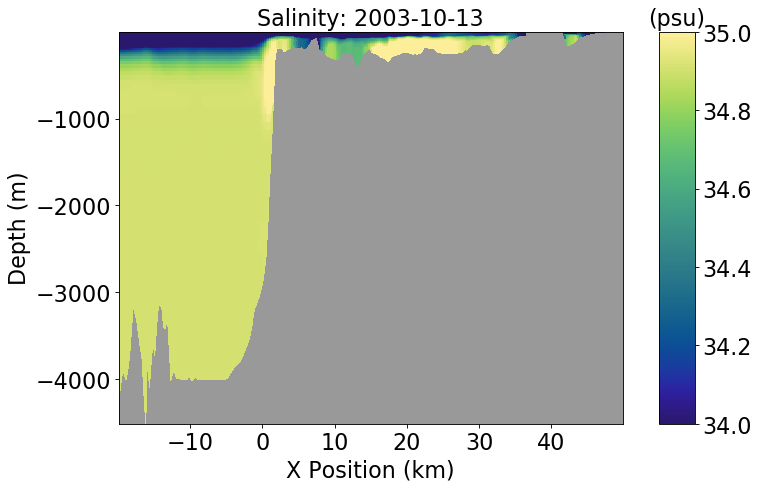

In [32]:
fig = plt.figure(figsize=(9, 7), dpi= 80, facecolor='w', edgecolor='k')
#ax = plt.axes
ax1 = fig.add_axes([0.05,0.1,0.7,0.7])  #left pos. bottom pos. width, height #ax1 = fig.add_subplot(111)
ax2 = fig.add_axes([.8, 0.1, 0.05, 0.7])
ax1.set_facecolor((0.6, 0.6, 0.6))

ax1.set_title('Salinity: '+title,fontsize=20)
ax1.set_xlabel('X Position (km)',fontsize=20)
ax1.set_ylabel('Depth (m)',fontsize=20)
plt.title('(psu)', fontsize=20)
#ax1.set_ylim(-150,0)
#ax1.set_xlim(70,85)

plotted= ax1.pcolor(xh2d,e2d,salt2d,cmap=cmocean.cm.haline,vmin=34.,vmax=35)   
cbar = plt.colorbar(cax=ax2, mappable=plotted, orientation = 'vertical')
cbar.ax.tick_params(labelsize=20);
ax1.tick_params(labelsize=20)
#ax1.set_xlim(ax1.get_xlim()[::-1])
plt.show()
        

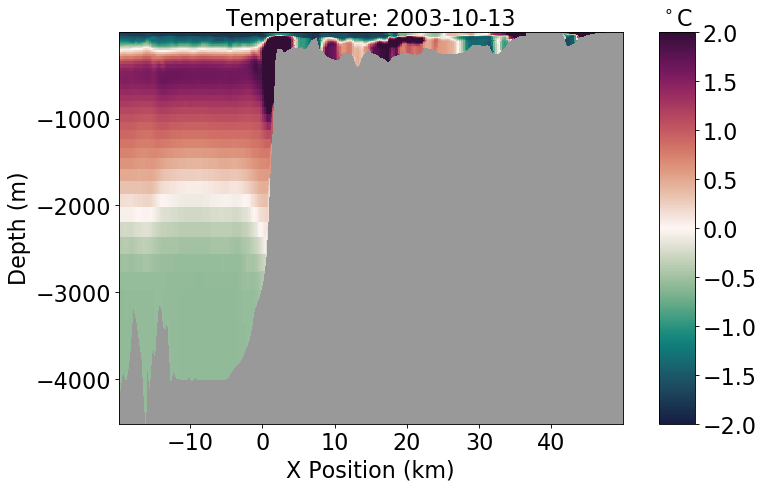

In [33]:
fig = plt.figure(figsize=(9, 7), dpi= 80, facecolor='w', edgecolor='k')
#ax = plt.axes
ax1 = fig.add_axes([0.05,0.1,0.7,0.7])  #left pos. bottom pos. width, height #ax1 = fig.add_subplot(111)
ax2 = fig.add_axes([.8, 0.1, 0.05, 0.7])
ax1.set_facecolor((0.6, 0.6, 0.6))

ax1.set_title('Temperature: '+title,fontsize=20)
ax1.set_xlabel('X Position (km)',fontsize=20)
ax1.set_ylabel('Depth (m)',fontsize=20)
plt.title('$^\circ$C', fontsize=20)
#ax1.set_ylim(-150,0)
#ax1.set_xlim(70,85)

plotted= ax1.pcolor(xh2d,e2d,temp2d,cmap=cmocean.cm.curl,vmin=-2.,vmax=2)   
cbar = plt.colorbar(cax=ax2, mappable=plotted, orientation = 'vertical')
cbar.ax.tick_params(labelsize=20);
ax1.tick_params(labelsize=20)
#ax1.set_xlim(ax1.get_xlim()[::-1])
plt.show()
        

In [50]:
np.squeeze(salt2d).shape

(75, 121)